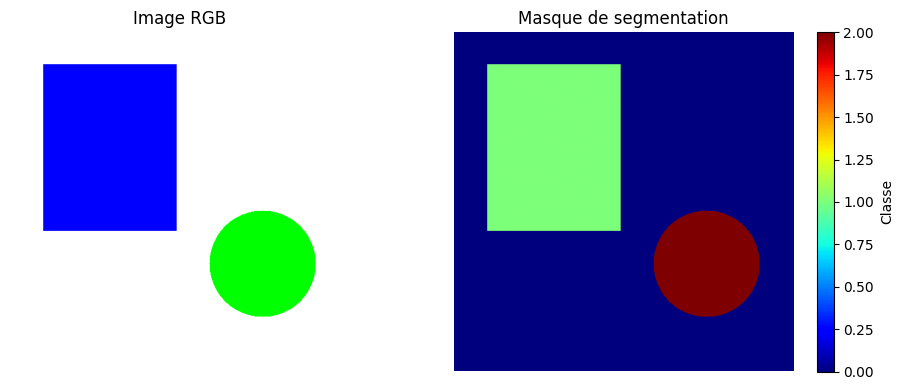

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Taille
H, W = 512, 512

# -----------------------
# 1) Image RGB (fond blanc)
# -----------------------
image = np.ones((H, W, 3), dtype=np.uint8) * 255

# Dessiner un rectangle bleu
cv2.rectangle(image, (50, 50), (250, 300), (0, 0, 255), -1)

# Dessiner un cercle vert
cv2.circle(image, (380, 350), 80, (0, 255, 0), -1)

# -----------------------
# 2) Masque de segmentation
# -----------------------
mask = np.zeros((H, W), dtype=np.uint8)

# Classe 1 : rectangle
cv2.rectangle(mask, (50, 50), (250, 300), 1, -1)

# Classe 2 : cercle
cv2.circle(mask, (380, 350), 80, 2, -1)

# -----------------------
# 3) Sauvegarde sur disque
# -----------------------
cv2.imwrite("data/images_masks/image.png", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
cv2.imwrite("data/images_masks/mask.png", mask)

# -----------------------
# 4) Visualisation
# -----------------------
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image RGB")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="jet", vmin=0, vmax=2)
plt.colorbar(label="Classe")
plt.title("Masque de segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()


Image shape : (512, 512, 3) float32
Mask shape  : (512, 512, 1) int32


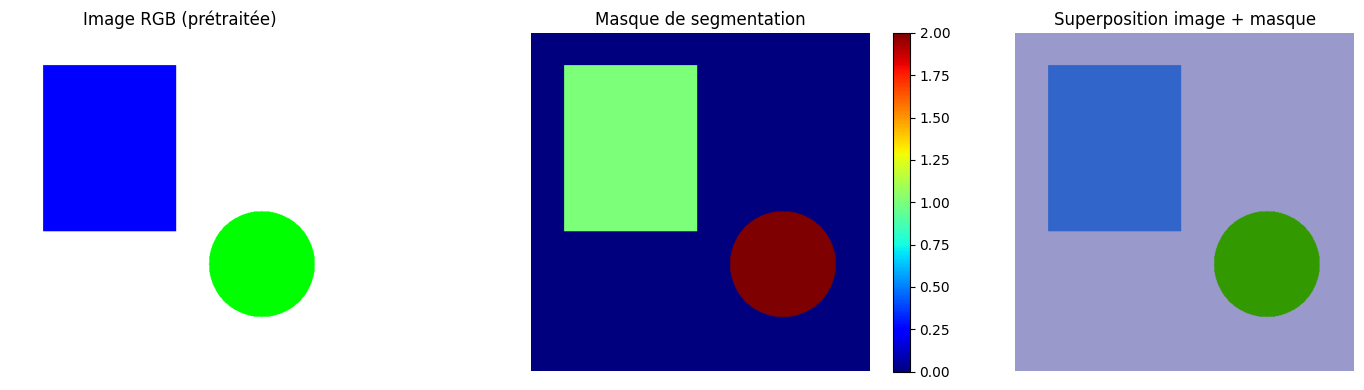

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def preprocess_image_and_mask(img_path, mask_path, target_size=(512, 512)):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Impossible de lire l'image : {img_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)
    img = img.astype(np.float32) / 255.0

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError(f"Impossible de lire le masque : {mask_path}")

    mask = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)
    mask = np.expand_dims(mask, axis=-1).astype(np.int32)

    return img, mask


# -----------------------
# Visualisation
# -----------------------
def show_image_and_mask(img, mask):
    """
    Affiche l'image RGB, le masque, et une superposition image + masque.
    """

    mask_2d = mask.squeeze()  # (H, W)

    plt.figure(figsize=(15, 4))

    # Image
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Image RGB (prétraitée)")
    plt.axis("off")

    # Masque seul
    plt.subplot(1, 3, 2)
    plt.imshow(mask_2d, cmap="jet")
    plt.title("Masque de segmentation")
    plt.colorbar(fraction=0.046)
    plt.axis("off")

    # Superposition
    plt.subplot(1, 3, 3)
    plt.imshow(img)
    plt.imshow(mask_2d, cmap="jet", alpha=0.4)
    plt.title("Superposition image + masque")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


# -----------------------
# Exemple d'utilisation
# -----------------------
img, mask = preprocess_image_and_mask(
    "data/images_masks/image.png",
    "data/images_masks/mask.png",
    target_size=(512, 512)
)

print("Image shape :", img.shape, img.dtype)
print("Mask shape  :", mask.shape, mask.dtype)

show_image_and_mask(img, mask)
